<img src="Monet_Logo-12-06-24_cropped_dpi600.png" style="width: 400px; height: 100px;">

# Module 0: First Instuctor Prep Meeting

This is a rough draft of a module that will be used for the MONET 2025 workshop. This module is going to cover "Network Science" and will mostly consist of using igraph to read in networks, manipulate the network, visulaize the network, find network properties, cluster the network and propogate information across the netowrk. The end part of this module is probably going to be reading in a molecular network, propagating gene information and finding biologically meaningful clusters.  

The workflow I am using is to develop this so people can use it directly from the MONET repo examples folder, but then I will alter slightly when transferring to AnVIL. For most of your workflows, you do not need to add anything to the MONET repo as you develop and we can just directly add your code to an AnVIL workspace.

## Import the needed libraries

[Tidyverse](https://www.tidyverse.org)  
[igraph](https://igraph.org)

In [4]:
library(tidyverse)
library(igraph)

## Load some data

There are many places to grab a network and start learning. Some popular repositories are (add more text below about pro/cons of each)

* [Network Repositories](https://networkrepository.com/index.php)
* [UCIrvine](https://networkdata.ics.uci.edu/index.html)
* [SNAP](https://snap.stanford.edu/data/)
* [NDEx](https://www.ndexbio.org/index.html#/)

Let's start by using the karate network. This was orginally downloaded from https://networkrepository.com/soc-karate.php and then slighly processed into a more tradional edgelist. 

The graph "karate" contains the network of friendships between the 34
members of a karate club at a US university, as described by Wayne Zachary 
in 1977.  If you use these data in your work, please cite W. W. Zachary, An
information flow model for conflict and fission in small groups, Journal of
Anthropological Research 33, 452-473 (1977).   

In [93]:
# read the network in as a dateframe
df <- read_table("data/soc-karate.txt", col_names = FALSE)
head(df)


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_double()
)



X1,X2
<dbl>,<dbl>
2,1
3,1
4,1
5,1
6,1
7,1


In [94]:
# create an igrpah object
g <- graph_from_data_frame(df, directed = FALSE)

 ### Use the igraph documentation to find out how many nodes and edges are in the network 

In [115]:
### Add your code here ###

# num nodes
length(V(g))
# num edges
length(E(g))


[1] 34

[1] 78

### Example of how to visualize the network

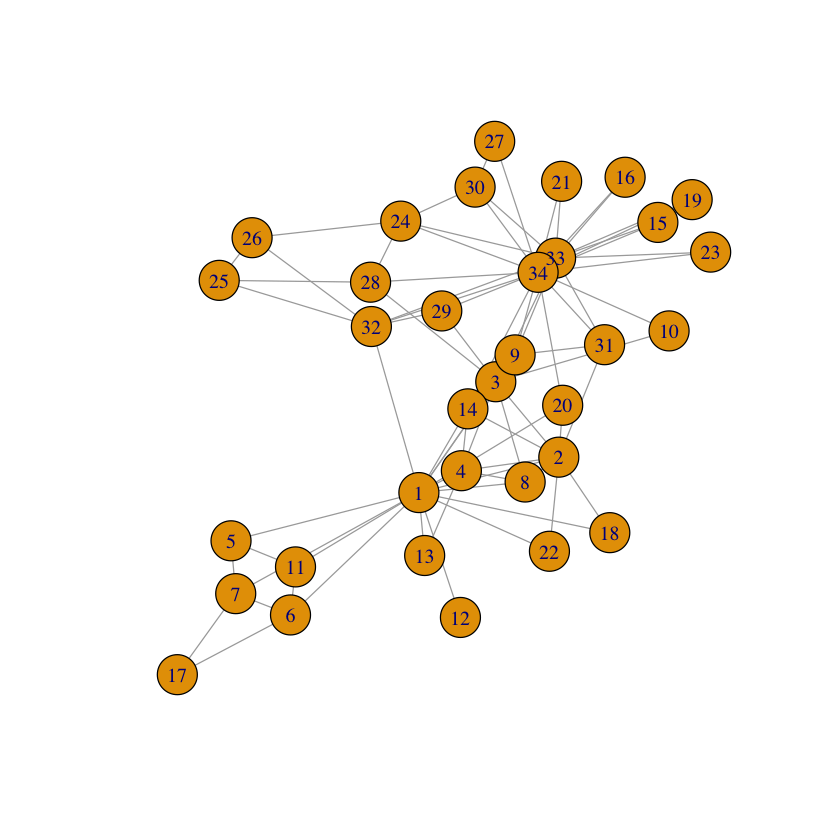

In [97]:
# display the network in 2D
# most layouts are stocastic so they will change everytime you run it
plot(g, layout = layout_nicely)

### Play around with some different layouts to see if you see anything interesting about this network

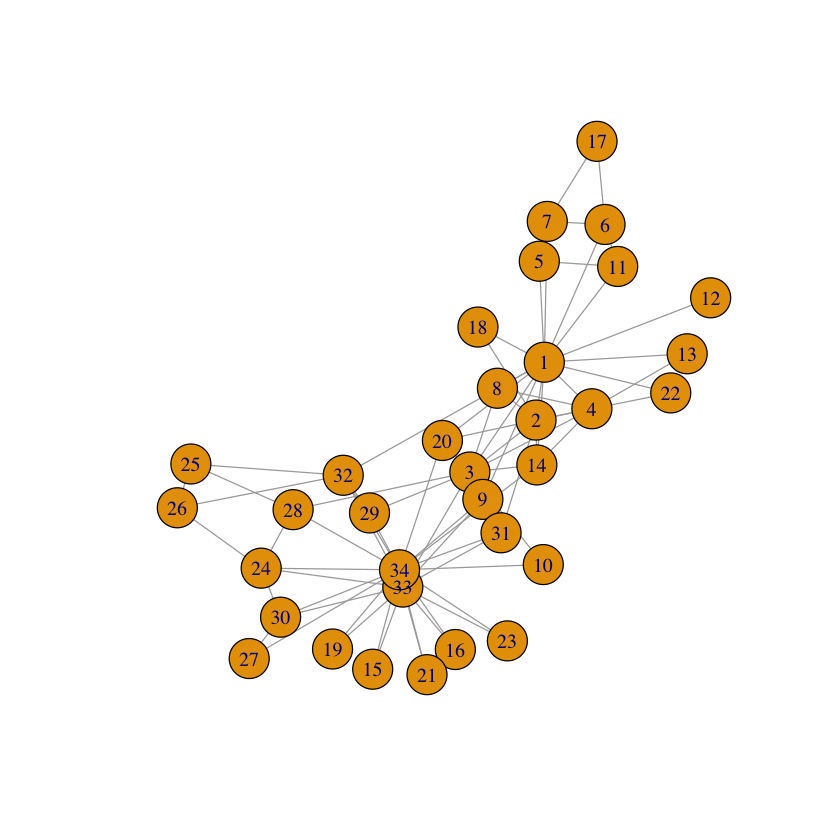

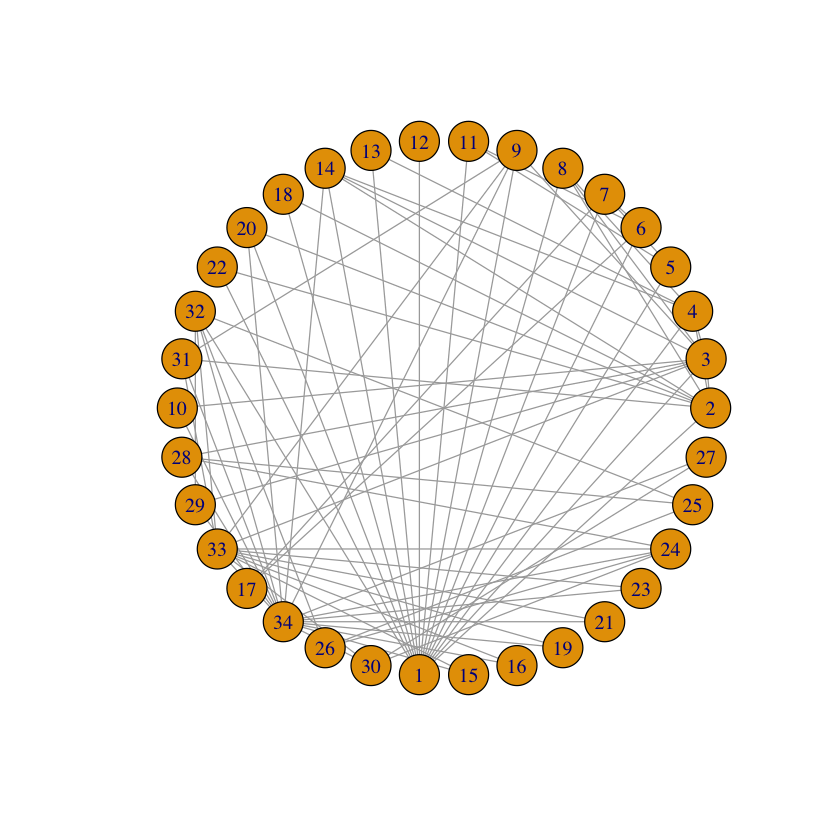

In [98]:
### Add your code here ###

plot(g, layout = layout_with_fr)
plot(g, layout = layout_in_circle)

### Add text about what you found interesting

### Look at some network properties  

Make a dataframe of the node degrees and the centrality of the nodes

In [101]:
### Add your text here ###

degrees <- degree(g, v = V(g))
df_degree <- tibble(NodeID = names(degrees),
       Degree = degrees) %>%
    arrange(desc(Degree))

btw_central <- betweenness(g, v = V(g), directed = FALSE)
df_central <- tibble(NodeID = names(btw_central),
                     Centrality = btw_central) %>%
    arrange(desc(Centrality))

df_metrics <- left_join(df_degree, df_central, by = "NodeID")
df_metrics

NodeID,Degree,Centrality
<chr>,<dbl>,<dbl>
34,17,160.5515873
1,16,231.0714286
33,12,76.6904762
3,10,75.8507937
2,9,28.4785714
4,6,6.2880952
32,6,73.0095238
9,5,29.5293651
14,5,24.2158730


### Try making a plot where the node sizes change based on one of these metrics

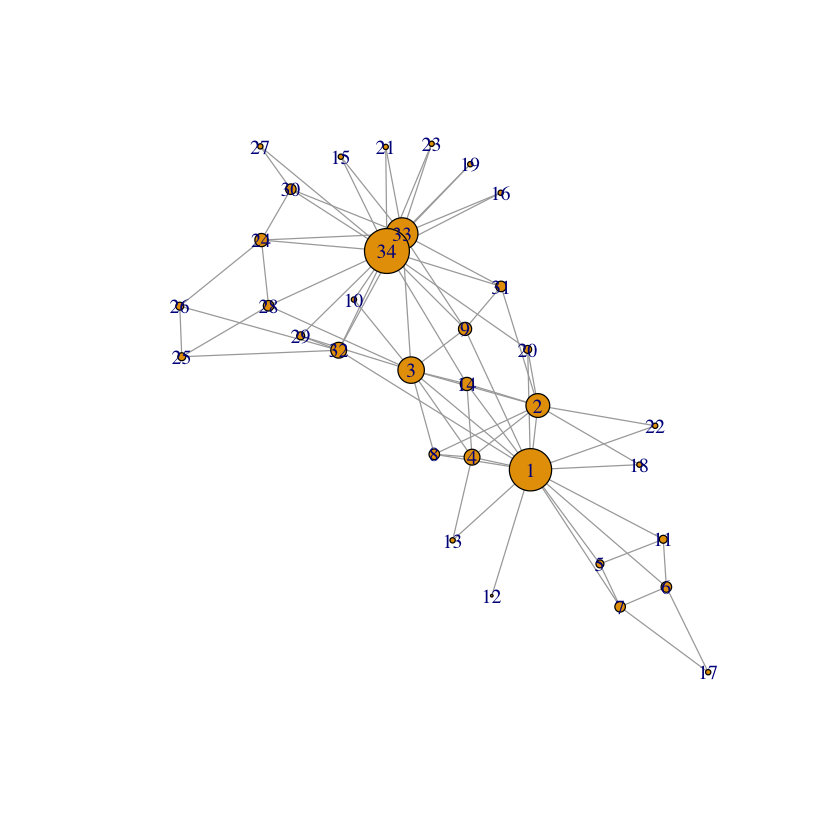

In [121]:
### Add your text here ###

node_sizes <- degrees
plot(g, layout = layout_nicely, vertex.size = node_sizes)

### Let's do some clustering to see if we can find out more about the data

In [106]:
# try out louvain clustering
louvain <- cluster_louvain(g, resolution = 1)
num_clusters <- length(louvain)
num_clusters
louvain

[1] 4

IGRAPH clustering multi level, groups: 4, mod: 0.42
+ groups:
  $`1`
   [1] "2"  "3"  "4"  "8"  "12" "13" "14" "18" "20" "22" "10" "1" 
  
  $`2`
  [1] "5"  "6"  "7"  "11" "17"
  
  $`3`
   [1] "9"  "31" "33" "34" "30" "15" "16" "19" "21" "23" "27"
  
  $`4`
  + ... omitted several groups/vertices

In [111]:
# get cluster Ids per cluster
cluster1_ids <- louvain[[1]]
cluster2_ids <- louvain[[2]]
cluster3_ids <- louvain[[3]]
cluster4_ids <- louvain[[4]]
# make the default to be red (so cluster 1 will be red)
node_colors <- rep(c("red"), each = length(V(g)))
text_colors <- rep(c("black"), each = length(V(g)))
# build a data frame that has network properties
df_color <- tibble(NodeID = names(btw_central),
                   Color =node_colors,
                   Text = text_colors) %>%
    mutate(Color = if_else(NodeID %in% cluster2_ids, "blue", Color)) %>%
    mutate(Color = if_else(NodeID %in% cluster3_ids, "yellow", Color)) %>%
    mutate(Color = if_else(NodeID %in% cluster4_ids, "green", Color)) %>%
    mutate(Text = if_else(NodeID %in% cluster2_ids, "white", Text))
df_color
node_colors <- df_color %>% pull(Color)
text_colors <- df_color %>% pull(Text)

NodeID,Color,Text
<chr>,<chr>,<chr>
2,red,black
3,red,black
4,red,black
5,blue,white
6,blue,white
7,blue,white
8,red,black
9,yellow,black
11,blue,white


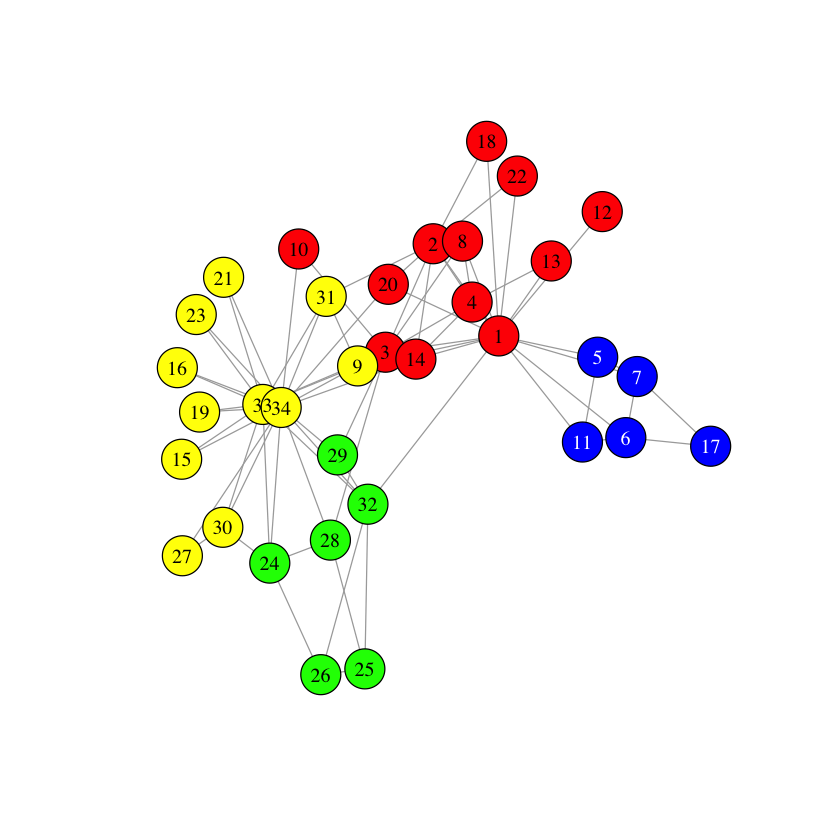

In [112]:
# make a plot of the graph
plot(g, layout = layout_nicely, vertex.color=node_colors, vertex.label.color = text_colors)

### Try various clustering methods to see how they work and how senesitive they are

To get an idea of what the real clustering result should be like check out the [wiki page](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) for this network

In [113]:
### Add your code here ###



There will be a break until everyone gets here, we will discuss and then the next half is going to be using a molecular network and GO term annoatations to find how networks can give more biology.  